CODE BLOCK: 1

<!--
>**This is Bold**
>>*This is Italics*
>>>- Simple statement
>>> - `string`
>>>> - $ mathematical symbols $
>>>> 1. Number 1
>>>> 2. Number 2


&#x25BA;


*** -->

# Session 11 - Assignment
## Basic expectations
- Follow good structure for Code (Reference: https://github.com/kuangliu/pytorch-cifar)
- Create
  - models folder - this is where you'll add all of your future models. Copy resnet.py into this folder, this file should only have ResNet 18/34 models. Delete Bottleneck Class
  - main.py - from Google Colab, now onwards, this is the file that you'll import (along with the model). Your main file shall be able to take these params or you should be able to pull functions from it and then perform operations, like (including but not limited to):
    - training and test loops
    - data split between test and train
    - epochs
    - batch size
    - which optimizer to run
    - do we run a scheduler?
  - utils.py file (or a folder later on when it expands) - this is where you will add all of your utilities like:
    - image transforms,
    - gradcam,
    - misclassification code,
    - tensorboard related stuff
    - advanced training policies, etc
    - etc
  - Your assignment is to build the above training structure. Train ResNet18 on Cifar10 for 20 Epochs. The assignment must:
    - pull your Github code to Google Colab (don't copy-paste code)
    - prove that you are following the above structure
    - that the code in your Google Colab notebook is NOTHING.. barely anything. There should not be any function or class that you can define in your Google Colab Notebook. Everything must be imported from all of your other files
    - your colab file must:
      - train resnet18 for 20 epochs on the CIFAR10 dataset
      - show loss curves for test and train datasets
      - show a gallery of 10 misclassified images
      - show gradcamLinks to an external site. output on 10 misclassified images. Remember if you are applying GradCAM on a channel that is less than 5px, then please don't bother to submit the assignment. 😡🤬🤬🤬🤬
    - Once done, upload the code to GitHub, and share the code. This readme must link to the main repo so we can read your file structure.
    - Train for 20 epochs
    - Get 10 misclassified images
    - Get 10 GradCam outputs on any misclassified images (remember that you MUST use the library we discussed in class)
    - Apply these transforms while training:
      - RandomCrop(32, padding=4)
      - CutOut(16x16)

### Results:
- Epochs: 20
- Parameters: 46,000
- Training Batch size: 64
- Testing Batch size: 64
- Training
  - Loss=0.6108
  - Batch_id=781
  - Accuracy=72.16%
- Testing
  - Average loss: 0.7305
  - Accuracy: 7451/10000 (74.51%)

### To be provided
- Model code
- Torch Summary
- Albumentations code
- Training log
- README.md link


### [1. Import appropriate modules required in this file](#section-1)
- import model: importing the code written in model.py that is kept in path of current working directory
- import utils: Similarly importing code in utils.py

In [1]:
# !pip install torchsummary
!pip install grad-cam
!pip install torch-lr-finder

In [2]:
# !python main.py --num_epochs=3 --lr=0.1
!git clone https://github.com/ChintanShahDS/ERAV2_Main.git
# !git pull https://github.com/ChintanShahDS/ERAV2_Main.git

fatal: destination path 'ERAV2_Main' already exists and is not an empty directory.


### [Can be run as a main file - Outputs will be generated in output folder]
- Call main.py after git pull
- Pass various parameters to choose from, else defaults will be used

In [3]:
# !python ERAV2_Main/main.py --num_epochs=3 --lr=0.01

In [4]:
'''Train CIFAR10 with PyTorch.'''
import os
import argparse
import sys
import time
import math
import cv2
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

from ERAV2_Main.models import *
from ERAV2_Main.utils import *
from ERAV2_Main.main import *

In [5]:
!mkdir output
!mkdir temp

mkdir: cannot create directory ‘output’: File exists
mkdir: cannot create directory ‘temp’: File exists


In [6]:
num_epochs = 20
base_lr = 0.01
batchsize = 512
initialModelPath = 'InitialModel.pth'

optimizer_name='SGD'
criterion_name='ÇrossEntropyLoss'
scheduler_name="OneCycleLR"

In [7]:
# print(optimizer_name, criterion_name, scheduler_name)

# if(scheduler_name=="ÓneCycleLR"):
#     print("Scheduler name:", scheduler_name)
# else:
#     print("Incorrect Scheduler name")

# if (criterion_name=='ÇrossEntropyLoss'):
#     print("criterion_name:", criterion_name)
# else:
#     print("This Loss Criteria is currently not supported")


Start of the main module


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


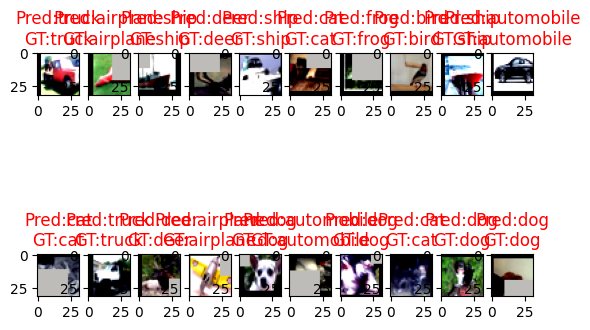

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


==> Building model..
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.83E-01


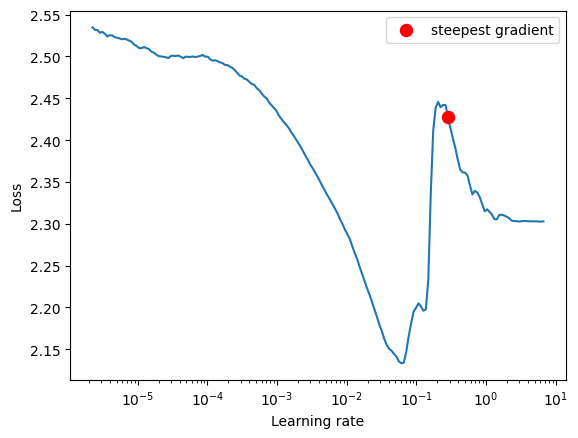

max_LR: 0.28330961018393264

Epoch: 1


Train: Loss=1.6437 Batch_id=97 Accuracy=31.87: 100%|██████████| 98/98 [00:48<00:00,  2.04it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 1.8424, Accuracy: 15936/50000 (31.87%)
Last computed learning rate: [0.0708997985281426]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0032, Accuracy: 4231/10000 (42.31%)

Epoch: 2


Train: Loss=1.2861 Batch_id=97 Accuracy=48.18: 100%|██████████| 98/98 [00:48<00:00,  2.04it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 1.4113, Accuracy: 24090/50000 (48.18%)
Last computed learning rate: [0.11346863603789192]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0029, Accuracy: 4921/10000 (49.21%)

Epoch: 3


Train: Loss=1.0310 Batch_id=97 Accuracy=58.17: 100%|██████████| 98/98 [00:48<00:00,  2.01it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 1.1625, Accuracy: 29085/50000 (58.17%)
Last computed learning rate: [0.15603747354764125]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0021, Accuracy: 6369/10000 (63.69%)

Epoch: 4


Train: Loss=0.8199 Batch_id=97 Accuracy=64.70: 100%|██████████| 98/98 [00:48<00:00,  2.01it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.9907, Accuracy: 32349/50000 (64.70%)
Last computed learning rate: [0.1986063110573906]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0020, Accuracy: 6580/10000 (65.80%)

Epoch: 5


Train: Loss=0.9477 Batch_id=97 Accuracy=69.74: 100%|██████████| 98/98 [00:48<00:00,  2.03it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.8580, Accuracy: 34869/50000 (69.74%)
Last computed learning rate: [0.24117514856713992]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0017, Accuracy: 7112/10000 (71.12%)

Epoch: 6


Train: Loss=0.7140 Batch_id=97 Accuracy=72.68: 100%|██████████| 98/98 [00:48<00:00,  2.04it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.7788, Accuracy: 36338/50000 (72.68%)
Last computed learning rate: [0.28310518123780865]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0017, Accuracy: 7068/10000 (70.68%)

Epoch: 7


Train: Loss=0.6828 Batch_id=97 Accuracy=75.18: 100%|██████████| 98/98 [00:48<00:00,  2.03it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.7107, Accuracy: 37591/50000 (75.18%)
Last computed learning rate: [0.2630711445176591]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0014, Accuracy: 7585/10000 (75.85%)

Epoch: 8


Train: Loss=0.5804 Batch_id=97 Accuracy=77.40: 100%|██████████| 98/98 [00:48<00:00,  2.04it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.6439, Accuracy: 38700/50000 (77.40%)
Last computed learning rate: [0.24303710779750962]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0014, Accuracy: 7645/10000 (76.45%)

Epoch: 9


Train: Loss=0.5162 Batch_id=97 Accuracy=79.39: 100%|██████████| 98/98 [00:47<00:00,  2.04it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.5923, Accuracy: 39696/50000 (79.39%)
Last computed learning rate: [0.2230030710773601]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0013, Accuracy: 7947/10000 (79.47%)

Epoch: 10


Train: Loss=0.5660 Batch_id=97 Accuracy=80.65: 100%|██████████| 98/98 [00:48<00:00,  2.01it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.5609, Accuracy: 40326/50000 (80.65%)
Last computed learning rate: [0.2029690343572106]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0010, Accuracy: 8367/10000 (83.67%)

Epoch: 11


Train: Loss=0.5156 Batch_id=97 Accuracy=81.70: 100%|██████████| 98/98 [00:57<00:00,  1.71it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.5269, Accuracy: 40851/50000 (81.70%)
Last computed learning rate: [0.18293499763706106]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0011, Accuracy: 8186/10000 (81.86%)

Epoch: 12


Train: Loss=0.5656 Batch_id=97 Accuracy=83.13: 100%|██████████| 98/98 [00:48<00:00,  2.03it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.4859, Accuracy: 41567/50000 (83.13%)
Last computed learning rate: [0.16290096091691153]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0013, Accuracy: 7926/10000 (79.26%)

Epoch: 13


Train: Loss=0.5978 Batch_id=97 Accuracy=83.57: 100%|██████████| 98/98 [00:54<00:00,  1.80it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.4700, Accuracy: 41784/50000 (83.57%)
Last computed learning rate: [0.142866924196762]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0011, Accuracy: 8215/10000 (82.15%)

Epoch: 14


Train: Loss=0.3671 Batch_id=97 Accuracy=84.56: 100%|██████████| 98/98 [00:49<00:00,  1.97it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.4417, Accuracy: 42279/50000 (84.56%)
Last computed learning rate: [0.1228328874766125]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0009, Accuracy: 8504/10000 (85.04%)

Epoch: 15


Train: Loss=0.3899 Batch_id=97 Accuracy=85.74: 100%|██████████| 98/98 [00:49<00:00,  1.99it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.4117, Accuracy: 42868/50000 (85.74%)
Last computed learning rate: [0.102798850756463]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0009, Accuracy: 8524/10000 (85.24%)

Epoch: 16


Train: Loss=0.3690 Batch_id=97 Accuracy=86.78: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.3816, Accuracy: 43389/50000 (86.78%)
Last computed learning rate: [0.08276481403631344]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0008, Accuracy: 8591/10000 (85.91%)

Epoch: 17


Train: Loss=0.2822 Batch_id=97 Accuracy=87.46: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.3607, Accuracy: 43732/50000 (87.46%)
Last computed learning rate: [0.06273077731616394]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0007, Accuracy: 8843/10000 (88.43%)

Epoch: 18


Train: Loss=0.3350 Batch_id=97 Accuracy=88.45: 100%|██████████| 98/98 [00:48<00:00,  2.01it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.3286, Accuracy: 44224/50000 (88.45%)
Last computed learning rate: [0.042696740596014415]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0007, Accuracy: 8922/10000 (89.22%)

Epoch: 19


Train: Loss=0.2830 Batch_id=97 Accuracy=89.94: 100%|██████████| 98/98 [00:49<00:00,  2.00it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.2882, Accuracy: 44971/50000 (89.94%)
Last computed learning rate: [0.022662703875864887]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0007, Accuracy: 8924/10000 (89.24%)

Epoch: 20


Train: Loss=0.2695 Batch_id=97 Accuracy=91.54: 100%|██████████| 98/98 [00:48<00:00,  2.03it/s]


Processed: 50000, Len TrainLoader: 98
Train set: Average loss: 0.2453, Accuracy: 45770/50000 (91.54%)
Last computed learning rate: [0.0026286671557153585]


target total: 10000 test_loader len: 10000
Test set: Average loss: 0.0005, Accuracy: 9183/10000 (91.83%)


<Figure size 640x480 with 0 Axes>

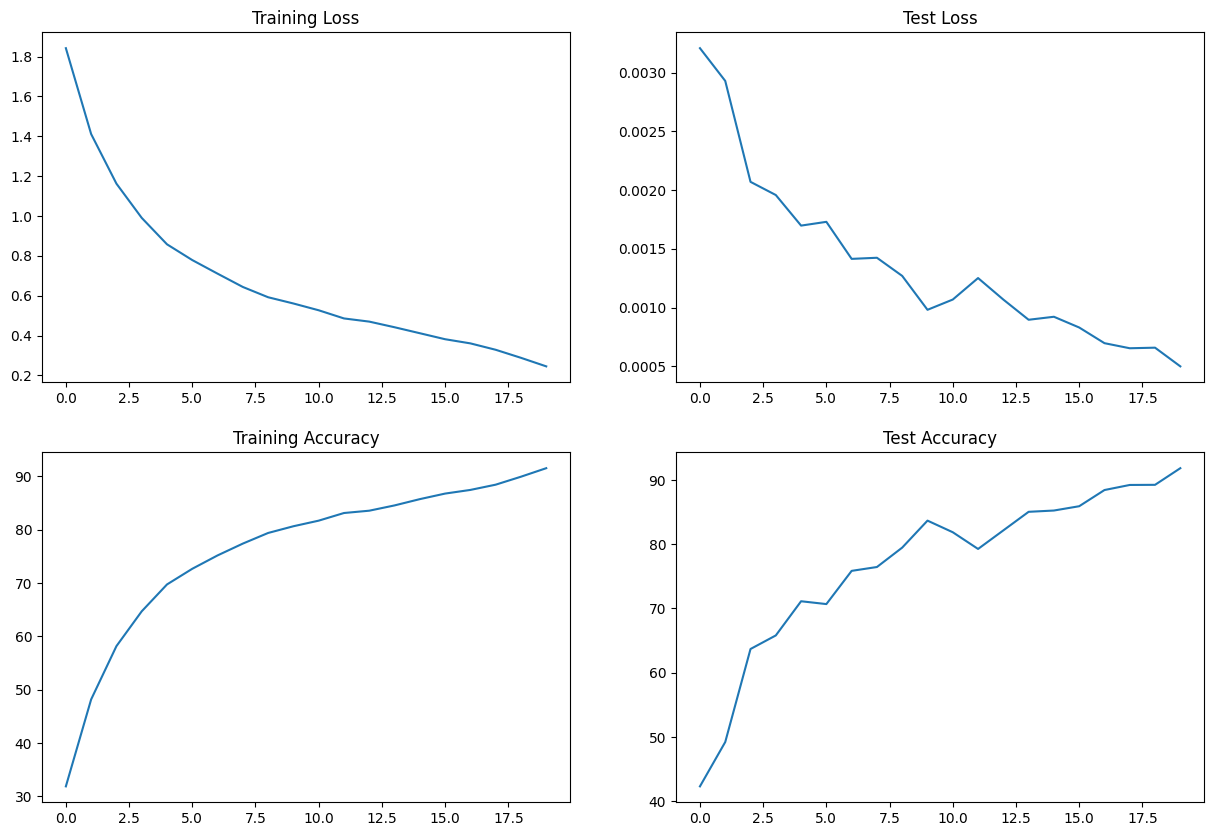

In [8]:
print("Start of the main module")

device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_loader, test_loader, classes = getCifar10DataLoader(batchsize)
visualizeData(train_loader, 20, classes)

# Model
print('==> Building model..')
mymodel = ResNet18()
mymodel = mymodel.to(device)
torch.save(mymodel, initialModelPath)
summary(mymodel, input_size=(3, 32, 32))

mymodel, train_losses, test_losses, train_accs, test_accs = runTraining(train_loader, test_loader, initialModelPath, optimizer_name, criterion_name, scheduler_name, device, num_epochs=num_epochs, base_lr=base_lr)

drawLossAccuracyPlots(train_losses, train_accs, test_losses, test_accs)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


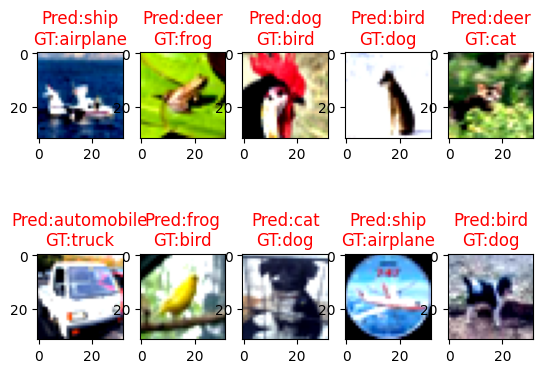

In [9]:
numImages = 10
images, nonMatchingLabels, incorrectPreds = incorrectOutcomes(mymodel, device, test_loader, numImages)
showIncorrectPreds(numImages, images, incorrectPreds, nonMatchingLabels,classes)

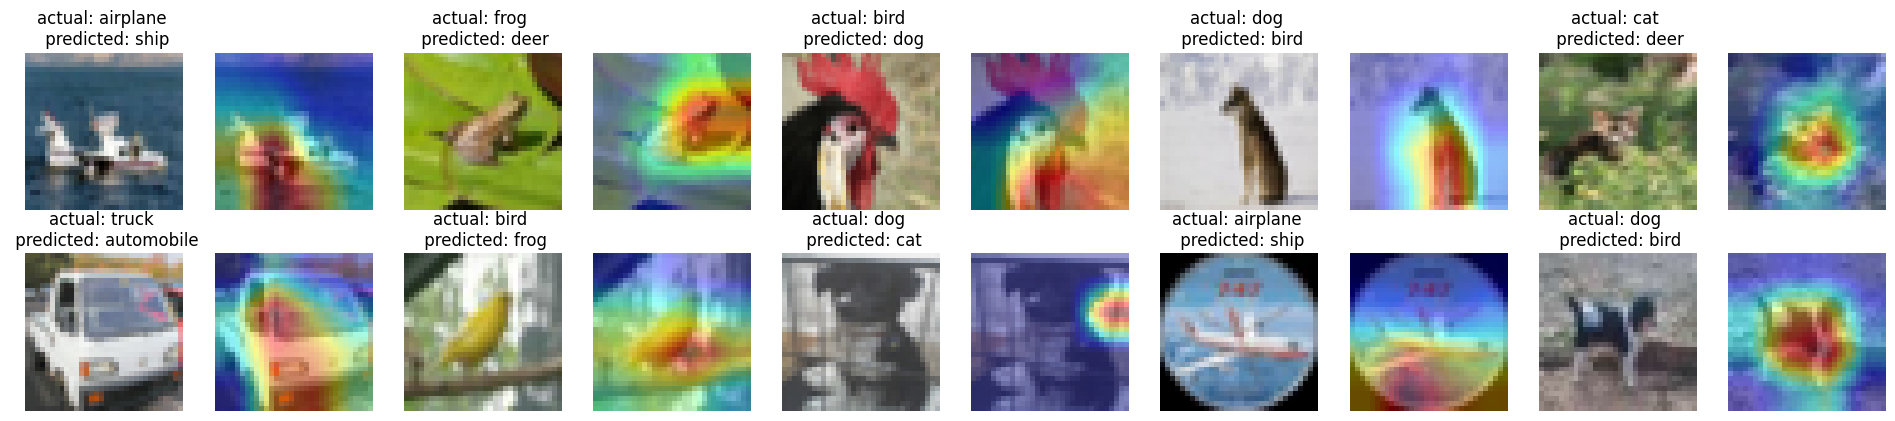

In [10]:
showGradCam(numImages, images, incorrectPreds, nonMatchingLabels, classes, mymodel, [mymodel.layer4[-1]])